In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = "PIB1947618.txt"

In [4]:
with open(file_path, "r", encoding="utf-8") as file:
 speech_text = file.read()

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
speech_text_cleaned = re.sub(r'[^\w\s]', '', speech_text)
speech_text_cleaned = speech_text_cleaned.lower()
words = word_tokenize(speech_text_cleaned)
stop_words = set(stopwords.words("english"))
words_filtered = [word for word in words if word not in stop_words]
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]


In [9]:
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]


In [10]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)["compound"] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)

In [11]:
print('The average sentiment is:', average_sentiment)

The average sentiment is: 0.020620501868659876


In [12]:
positive_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] > 0]
negative_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] <0]
neutral_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] >=0]


In [13]:
print('The positive words are:', positive_words)

The positive words are: ['confidence', 'respected', 'reached', 'respected', 'gratitude', 'trust', 'god', 'benevolent', 'gods', 'desires', 'blessing', 'god', 'god', 'gods', 'well', 'confidence', 'grand', 'blessings', 'respected', 'better', 'actively', 'important', 'safeguard', 'benefit', 'greater', 'actively', 'well', 'valuable', 'interest', 'trust', 'well', 'parties', 'care', 'party', 'party', 'party', 'care', 'respected', 'allow', 'confidence', 'confidence', 'kind', 'matter', 'supporters', 'fun', 'treasury', 'treasury', 'prepared', 'prepared', 'respected', 'strong', 'desire', 'natural', 'create', 'impression', 'carefully', 'respected', 'certain', 'confidence', 'partys', 'confidence', 'party', 'chance', 'feeling', 'well', 'generosity', 'chance', 'sympathy', 'please', 'laugh', 'respected', 'free', 'energy', 'dreams', 'great', 'opportunity', 'dream', 'significance', 'importance', 'want', 'great', 'strength', 'strong', 'great', 'determination', 'success', 'strength', 'great', 'faith', 'ab

In [14]:
print('The negative words are:', negative_words)

The negative words are: ['seriousness', 'unconcerned', 'serious', 'poor', 'betrayed', 'hunger', 'poor', 'hunger', 'worried', 'forced', 'disappointed', 'hard', 'pitiful', 'forget', 'disappointment', 'mess', 'humiliates', 'seriousness', 'demand', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poverty', 'poor', 'distressed', 'struggle', 'lower', 'deaths', 'forced', 'hardships', 'poor', 'poor', 'skeptical', 'distrust', 'arrogance', 'offensive', 'exhausted', 'offensive', 'grave', 'grave', 'insults', 'offensive', 'negativity', 'ill', 'collapse', 'ruined', 'destroyed', 'disappointment', 'ill', 'scam', 'serious', 'crisis', 'damage', 'ruins', 'destroyed', 'provoke', 'die', 'negative', 'serious', 'provoke', 'ill', 'ruins', 'poor', 'poor', 'criticise', 'curse', 'curse', 'hard', 'tragedy', 'deprivation', 'lacks', 'poverty', 'hard', 'hard', 'hard', 'disappointment', 'poor', 'cynicism', 'disappointment', 'attacks', 'terrorists', 'deny', 'terrorist', 'attacks', 'fire', 'terrorism', 'strikes', 'terror

In [15]:
print('The neutral words are:', neutral_words)

The neutral words are: ['prime', 'ministers', 'office', 'english', 'rendering', 'pms', 'reply', 'confidence', 'motion', 'lok', 'sabha', '10th', 'august', '2023', 'posted', '10', 'aug', '2023', '1112pm', 'pib', 'delhi', 'respected', 'mr', 'speaker', 'past', 'three', 'days', 'several', 'honble', 'senior', 'members', 'expressed', 'thoughts', 'almost', 'views', 'reached', 'detail', 'also', 'listened', 'speeches', 'respected', 'mr', 'speaker', 'today', 'express', 'gratitude', 'millions', 'citizens', 'country', 'repeatedly', 'shown', 'trust', 'government', 'mr', 'speaker', 'said', 'god', 'benevolent', 'gods', 'fulfils', 'desires', 'someone', 'making', 'someone', 'medium', 'consider', 'blessing', 'god', 'opposition', 'came', 'noconfidence', 'motion', 'willed', 'god', 'also', 'gods', 'command', '2018', 'colleagues', 'opposition', 'brought', 'noconfidence', 'motion', 'time', 'also', 'said', 'noconfidence', 'motion', 'floor', 'test', 'government', 'rather', 'floor', 'test', 'said', 'day', 'well'

In [16]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)


In [17]:
print('The positive words frequency is:', word_freq_positive)
print('The negative words frequency is:', word_freq_negative)
print('The neutral words frequency is:', word_freq_neutral)


The positive words frequency is: <FreqDist with 220 samples and 620 outcomes>
The negative words frequency is: <FreqDist with 152 samples and 288 outcomes>
The neutral words frequency is: <FreqDist with 1895 samples and 5331 outcomes>


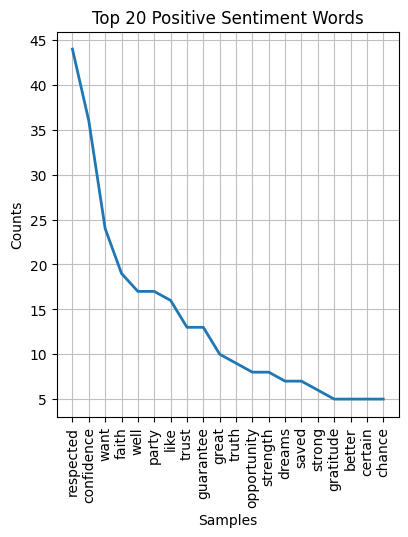

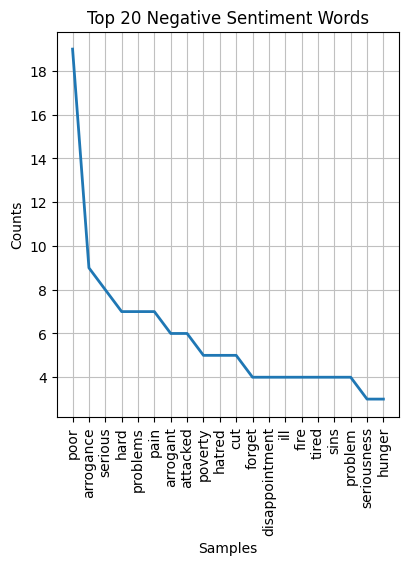

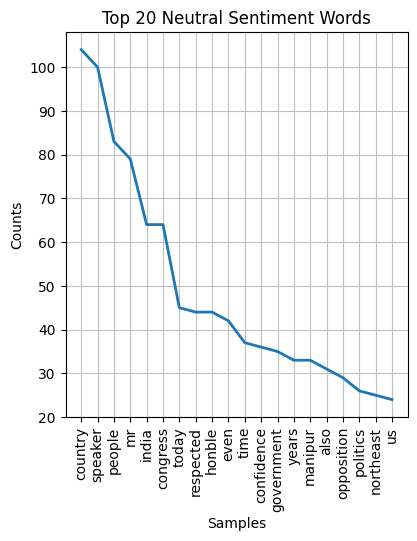

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
word_freq_positive.plot(20, title="Top 20 Positive Sentiment Words")
plt.figure(figsize=(15, 5))
plt.subplot(132)
word_freq_negative.plot(20, title="Top 20 Negative Sentiment Words")
plt.figure(figsize=(15, 5))
plt.subplot(133)
word_freq_neutral.plot(20, title="Top 20 Neutral Sentiment Words")
plt.tight_layout()
plt.show()
